In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Dropout, Flatten,Input, BatchNormalization
from keras import regularizers
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Layer,Lambda

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("breastcancerdataset.csv")

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Don't need id column and Unnamed:32 column
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataset.shape

(569, 31)

In [6]:
#check for null values
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
y = dataset.iloc[:,0].values
x = dataset.drop(["diagnosis"],axis=1)
#y = dataset.iloc[:,0].values

In [8]:
x.to_numpy()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
x.shape

(569, 30)

In [10]:
print(y)
#encoding Categorical Data Turning 'y' values into numeric value
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = labelencoder_x.fit_transform(y)
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [11]:
#spliting the dataset into train and test set
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.1, random_state = 0)

In [12]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

In [14]:
input_data = Input(shape=(30,))#0
encoded = Dense(20, activation='relu')(input_data)#1
encoded = Dense(10, activation='relu')(encoded)#2
encoded = Dense(3, activation='relu')(encoded)#3

decoded = Dense(10, activation='relu')(encoded)#4
decoded = Dense(20, activation='relu')(decoded)#5
decoded = Dense(30, activation='sigmoid')(decoded)#6

stackautoencoder = Model(input_data, decoded)
stackautoencoder.compile(loss="mse",optimizer='Adam')
stackautoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                630 

In [15]:
#Autoencoder1
input_data1 = Input(shape=(30,))#0
encoded1 = Dense(20, activation='relu')(input_data1)#1
decoded1 = Dense(30, activation='sigmoid')(encoded1)#6

autoencoder1 = Model(input_data1, decoded1)
encoder1 = Model(input_data1, encoded1)

#Autoencoder2
input_data2 = Input(shape=(20,))
encoded2 = Dense(10, activation='relu')(input_data2)#2
decoded2 = Dense(20, activation='relu')(encoded2)#5

autoencoder2 = Model(input_data2, decoded2)
encoder2 = Model(input_data2, encoded2)

#Autoencoder3
input_data3 = Input(shape=(10,))
encoded3 = Dense(3, activation='relu')(input_data3)#3
decoded3 = Dense(10, activation='relu')(encoded3)#4

autoencoder3 = Model(input_data3, decoded3)
encoder3 = Model(input_data3, encoded3)

In [16]:
autoencoder1.compile(loss="mse",optimizer='Adam')
autoencoder2.compile(loss="mse",optimizer='Adam')
autoencoder3.compile(loss="mse",optimizer='Adam')

encoder1.compile(loss="mse",optimizer='Adam')
encoder2.compile(loss="mse",optimizer='Adam')
encoder3.compile(loss="mse",optimizer='Adam')

In [17]:
history1 = autoencoder1.fit(x_train, x_train,epochs=500,shuffle=True,validation_split = 0.30)

Train on 358 samples, validate on 154 samples
Epoch 1/500
358/358 [==============================] - 0s 275us/step - loss: 0.0978 - val_loss: 0.0924
Epoch 2/500
358/358 [==============================] - 0s 43us/step - loss: 0.0906 - val_loss: 0.0851
Epoch 3/500
358/358 [==============================] - 0s 43us/step - loss: 0.0830 - val_loss: 0.0773
Epoch 4/500
358/358 [==============================] - 0s 45us/step - loss: 0.0746 - val_loss: 0.0686
Epoch 5/500
358/358 [==============================] - 0s 41us/step - loss: 0.0652 - val_loss: 0.0592
Epoch 6/500
358/358 [==============================] - 0s 44us/step - loss: 0.0557 - val_loss: 0.0507
Epoch 7/500
358/358 [==============================] - 0s 46us/step - loss: 0.0474 - val_loss: 0.0436
Epoch 8/500
358/358 [==============================] - 0s 43us/step - loss: 0.0409 - val_loss: 0.0387
Epoch 9/500
358/358 [==============================] - 0s 44us/step - loss: 0.0363 - val_loss: 0.0354
Epoch 10/500
358/358 [=============

358/358 [==============================] - 0s 39us/step - loss: 0.0026 - val_loss: 0.0031
Epoch 160/500
358/358 [==============================] - 0s 39us/step - loss: 0.0026 - val_loss: 0.0031
Epoch 161/500
358/358 [==============================] - 0s 42us/step - loss: 0.0026 - val_loss: 0.0031
Epoch 162/500
358/358 [==============================] - 0s 39us/step - loss: 0.0026 - val_loss: 0.0030
Epoch 163/500
358/358 [==============================] - 0s 39us/step - loss: 0.0026 - val_loss: 0.0030
Epoch 164/500
358/358 [==============================] - ETA: 0s - loss: 0.003 - 0s 42us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 165/500
358/358 [==============================] - 0s 45us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 166/500
358/358 [==============================] - 0s 42us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 167/500
358/358 [==============================] - 0s 47us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 168/500
358/358 [==============================]

Epoch 316/500
358/358 [==============================] - 0s 45us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 317/500
358/358 [==============================] - 0s 50us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 318/500
358/358 [==============================] - 0s 47us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 319/500
358/358 [==============================] - 0s 42us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 320/500
358/358 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 321/500
358/358 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 322/500
358/358 [==============================] - 0s 42us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 323/500
358/358 [==============================] - 0s 47us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 324/500
358/358 [==============================] - 0s 59us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 325/500
358/358 [==============================] - 0s 42us

Epoch 395/500
358/358 [==============================] - 0s 42us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 396/500
358/358 [==============================] - 0s 42us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 397/500
358/358 [==============================] - 0s 42us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 398/500
358/358 [==============================] - 0s 42us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 399/500
358/358 [==============================] - 0s 45us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 400/500
358/358 [==============================] - 0s 42us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 401/500
358/358 [==============================] - 0s 47us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 402/500
358/358 [==============================] - 0s 100us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 403/500
358/358 [==============================] - 0s 59us/step - loss: 0.0010 - val_loss: 0.0013
Epoch 404/500
358/358 [==============================] - 0s 59u

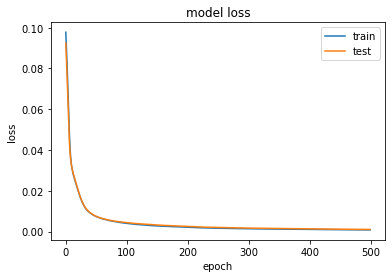

In [18]:
# AE1: lot training loss and validation split loss over the epochs

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('stackAE1_model_loss.png')
plt.show()

In [19]:
first_layer_code = encoder1.predict(x_train)
print(first_layer_code.shape)

(512, 20)


In [20]:
history2 = autoencoder2.fit(first_layer_code, first_layer_code,epochs=500,shuffle=True, validation_split = 0.30)

Train on 358 samples, validate on 154 samples
Epoch 1/500
358/358 [==============================] - 0s 261us/step - loss: 0.6635 - val_loss: 0.6272
Epoch 2/500
358/358 [==============================] - 0s 56us/step - loss: 0.5712 - val_loss: 0.5351
Epoch 3/500
358/358 [==============================] - 0s 42us/step - loss: 0.4915 - val_loss: 0.4640
Epoch 4/500
358/358 [==============================] - 0s 45us/step - loss: 0.4303 - val_loss: 0.4028
Epoch 5/500
358/358 [==============================] - 0s 50us/step - loss: 0.3684 - val_loss: 0.3296
Epoch 6/500
358/358 [==============================] - 0s 47us/step - loss: 0.3000 - val_loss: 0.2745
Epoch 7/500
358/358 [==============================] - 0s 47us/step - loss: 0.2576 - val_loss: 0.2433
Epoch 8/500
358/358 [==============================] - 0s 42us/step - loss: 0.2354 - val_loss: 0.2276
Epoch 9/500
358/358 [==============================] - 0s 42us/step - loss: 0.2239 - val_loss: 0.2198
Epoch 10/500
358/358 [=============

Epoch 80/500
358/358 [==============================] - 0s 59us/step - loss: 0.1325 - val_loss: 0.1353
Epoch 81/500
358/358 [==============================] - 0s 64us/step - loss: 0.1322 - val_loss: 0.1353
Epoch 82/500
358/358 [==============================] - 0s 64us/step - loss: 0.1318 - val_loss: 0.1347
Epoch 83/500
358/358 [==============================] - 0s 59us/step - loss: 0.1316 - val_loss: 0.1345
Epoch 84/500
358/358 [==============================] - 0s 59us/step - loss: 0.1314 - val_loss: 0.1345
Epoch 85/500
358/358 [==============================] - 0s 64us/step - loss: 0.1311 - val_loss: 0.1341
Epoch 86/500
358/358 [==============================] - 0s 64us/step - loss: 0.1308 - val_loss: 0.1338
Epoch 87/500
358/358 [==============================] - 0s 72us/step - loss: 0.1306 - val_loss: 0.1335
Epoch 88/500
358/358 [==============================] - 0s 72us/step - loss: 0.1304 - val_loss: 0.1334
Epoch 89/500
358/358 [==============================] - 0s 61us/step - lo

Epoch 159/500
358/358 [==============================] - 0s 42us/step - loss: 0.1196 - val_loss: 0.1225
Epoch 160/500
358/358 [==============================] - 0s 42us/step - loss: 0.1195 - val_loss: 0.1225
Epoch 161/500
358/358 [==============================] - 0s 103us/step - loss: 0.1193 - val_loss: 0.1223
Epoch 162/500
358/358 [==============================] - 0s 64us/step - loss: 0.1193 - val_loss: 0.1222
Epoch 163/500
358/358 [==============================] - 0s 45us/step - loss: 0.1193 - val_loss: 0.1224
Epoch 164/500
358/358 [==============================] - 0s 42us/step - loss: 0.1191 - val_loss: 0.1221
Epoch 165/500
358/358 [==============================] - 0s 42us/step - loss: 0.1191 - val_loss: 0.1220
Epoch 166/500
358/358 [==============================] - 0s 45us/step - loss: 0.1189 - val_loss: 0.1219
Epoch 167/500
358/358 [==============================] - 0s 45us/step - loss: 0.1189 - val_loss: 0.1219
Epoch 168/500
358/358 [==============================] - 0s 39u

Epoch 316/500
358/358 [==============================] - 0s 45us/step - loss: 0.1131 - val_loss: 0.1163
Epoch 317/500
358/358 [==============================] - 0s 45us/step - loss: 0.1131 - val_loss: 0.1163
Epoch 318/500
358/358 [==============================] - 0s 47us/step - loss: 0.1131 - val_loss: 0.1162
Epoch 319/500
358/358 [==============================] - 0s 42us/step - loss: 0.1130 - val_loss: 0.1162
Epoch 320/500
358/358 [==============================] - 0s 45us/step - loss: 0.1130 - val_loss: 0.1162
Epoch 321/500
358/358 [==============================] - 0s 47us/step - loss: 0.1130 - val_loss: 0.1162
Epoch 322/500
358/358 [==============================] - 0s 45us/step - loss: 0.1130 - val_loss: 0.1161
Epoch 323/500
358/358 [==============================] - 0s 42us/step - loss: 0.1130 - val_loss: 0.1161
Epoch 324/500
358/358 [==============================] - 0s 45us/step - loss: 0.1129 - val_loss: 0.1161
Epoch 325/500
358/358 [==============================] - 0s 42us

Epoch 395/500
358/358 [==============================] - 0s 39us/step - loss: 0.1119 - val_loss: 0.1148
Epoch 396/500
358/358 [==============================] - 0s 42us/step - loss: 0.1119 - val_loss: 0.1148
Epoch 397/500
358/358 [==============================] - 0s 39us/step - loss: 0.1119 - val_loss: 0.1147
Epoch 398/500
358/358 [==============================] - 0s 42us/step - loss: 0.1119 - val_loss: 0.1146
Epoch 399/500
358/358 [==============================] - 0s 39us/step - loss: 0.1119 - val_loss: 0.1146
Epoch 400/500
358/358 [==============================] - 0s 39us/step - loss: 0.1120 - val_loss: 0.1146
Epoch 401/500
358/358 [==============================] - 0s 36us/step - loss: 0.1118 - val_loss: 0.1146
Epoch 402/500
358/358 [==============================] - 0s 39us/step - loss: 0.1118 - val_loss: 0.1146
Epoch 403/500
358/358 [==============================] - 0s 42us/step - loss: 0.1117 - val_loss: 0.1145
Epoch 404/500
358/358 [==============================] - 0s 39us

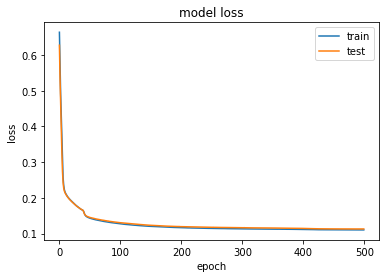

In [21]:
# AE2: lot training loss and validation split loss over the epochs

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('stackAE2_model_loss.png')
plt.show()

In [22]:
second_layer_code = encoder2.predict(first_layer_code)
print(first_layer_code.shape)

(512, 20)


In [23]:
history3 = autoencoder3.fit(second_layer_code, second_layer_code,epochs=500,shuffle=True,validation_split = 0.30)

Train on 358 samples, validate on 154 samples
Epoch 1/500
358/358 [==============================] - 0s 231us/step - loss: 2.1575 - val_loss: 2.2056
Epoch 2/500
358/358 [==============================] - 0s 42us/step - loss: 2.0608 - val_loss: 2.1014
Epoch 3/500
358/358 [==============================] - 0s 42us/step - loss: 1.9588 - val_loss: 1.9881
Epoch 4/500
358/358 [==============================] - 0s 36us/step - loss: 1.8491 - val_loss: 1.8652
Epoch 5/500
358/358 [==============================] - 0s 36us/step - loss: 1.7279 - val_loss: 1.7369
Epoch 6/500
358/358 [==============================] - 0s 39us/step - loss: 1.6072 - val_loss: 1.6138
Epoch 7/500
358/358 [==============================] - 0s 42us/step - loss: 1.4935 - val_loss: 1.5006
Epoch 8/500
358/358 [==============================] - 0s 42us/step - loss: 1.3928 - val_loss: 1.4004
Epoch 9/500
358/358 [==============================] - 0s 45us/step - loss: 1.3039 - val_loss: 1.3183
Epoch 10/500
358/358 [=============

Epoch 158/500
358/358 [==============================] - 0s 53us/step - loss: 0.9075 - val_loss: 0.9487
Epoch 159/500
358/358 [==============================] - 0s 59us/step - loss: 0.9071 - val_loss: 0.9483
Epoch 160/500
358/358 [==============================] - 0s 50us/step - loss: 0.9069 - val_loss: 0.9478
Epoch 161/500
358/358 [==============================] - 0s 47us/step - loss: 0.9065 - val_loss: 0.9477
Epoch 162/500
358/358 [==============================] - 0s 47us/step - loss: 0.9062 - val_loss: 0.9474
Epoch 163/500
358/358 [==============================] - 0s 50us/step - loss: 0.9060 - val_loss: 0.9470
Epoch 164/500
358/358 [==============================] - 0s 53us/step - loss: 0.9058 - val_loss: 0.9468
Epoch 165/500
358/358 [==============================] - 0s 59us/step - loss: 0.9055 - val_loss: 0.9466
Epoch 166/500
358/358 [==============================] - 0s 64us/step - loss: 0.9053 - val_loss: 0.9464
Epoch 167/500
358/358 [==============================] - 0s 53us

358/358 [==============================] - 0s 61us/step - loss: 0.8914 - val_loss: 0.9312
Epoch 315/500
358/358 [==============================] - 0s 56us/step - loss: 0.8914 - val_loss: 0.9312
Epoch 316/500
358/358 [==============================] - 0s 56us/step - loss: 0.8913 - val_loss: 0.9312
Epoch 317/500
358/358 [==============================] - 0s 53us/step - loss: 0.8913 - val_loss: 0.9310
Epoch 318/500
358/358 [==============================] - 0s 56us/step - loss: 0.8912 - val_loss: 0.9309
Epoch 319/500
358/358 [==============================] - 0s 53us/step - loss: 0.8911 - val_loss: 0.9311
Epoch 320/500
358/358 [==============================] - 0s 67us/step - loss: 0.8912 - val_loss: 0.9312
Epoch 321/500
358/358 [==============================] - 0s 61us/step - loss: 0.8913 - val_loss: 0.9312
Epoch 322/500
358/358 [==============================] - 0s 47us/step - loss: 0.8910 - val_loss: 0.9307
Epoch 323/500
358/358 [==============================] - 0s 42us/step - loss: 

Epoch 471/500
358/358 [==============================] - 0s 42us/step - loss: 0.8817 - val_loss: 0.9193
Epoch 472/500
358/358 [==============================] - 0s 42us/step - loss: 0.8817 - val_loss: 0.9192
Epoch 473/500
358/358 [==============================] - 0s 50us/step - loss: 0.8817 - val_loss: 0.9191
Epoch 474/500
358/358 [==============================] - 0s 39us/step - loss: 0.8816 - val_loss: 0.9193
Epoch 475/500
358/358 [==============================] - 0s 53us/step - loss: 0.8816 - val_loss: 0.9192
Epoch 476/500
358/358 [==============================] - 0s 42us/step - loss: 0.8814 - val_loss: 0.9188
Epoch 477/500
358/358 [==============================] - 0s 39us/step - loss: 0.8814 - val_loss: 0.9189
Epoch 478/500
358/358 [==============================] - 0s 39us/step - loss: 0.8812 - val_loss: 0.9187
Epoch 479/500
358/358 [==============================] - 0s 39us/step - loss: 0.8812 - val_loss: 0.9186
Epoch 480/500
358/358 [==============================] - 0s 42us

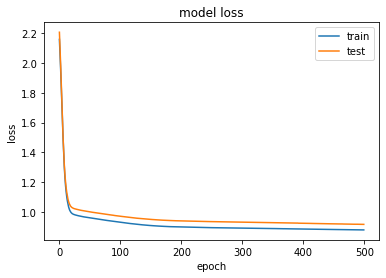

In [35]:
# AE3: lot training loss and validation split loss over the epochs

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('stackAE3_model_loss.png')
plt.show()

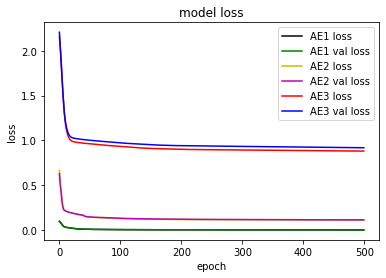

In [46]:

# AE3: lot training loss and validation split loss over the epochs
plt.plot(history1.history['loss'],'k',label='AE1 loss')
plt.plot(history1.history['val_loss'],'g',label='AE1 val loss')
plt.plot(history2.history['loss'],'y',label='AE2 loss')
plt.plot(history2.history['val_loss'],'m',label='AE2 val loss')
plt.plot(history3.history['loss'],'r',label='AE3 loss')
plt.plot(history3.history['val_loss'],'b',label='AE3 val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.savefig('stackAEwhole_model_loss.png')
plt.show()

In [25]:
#Stacked autoencoder
stackautoencoder.layers[1].set_weights(autoencoder1.layers[1].get_weights()) # first dense layer
stackautoencoder.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stackautoencoder.layers[3].set_weights(autoencoder3.layers[1].get_weights())
stackautoencoder.layers[4].set_weights(autoencoder3.layers[2].get_weights())
stackautoencoder.layers[5].set_weights(autoencoder2.layers[2].get_weights())
stackautoencoder.layers[6].set_weights(autoencoder1.layers[2].get_weights())

In [26]:
evaluation = stackautoencoder.evaluate(x_test, x_test)
print("Loss:",evaluation)

57/57 [==============================] - 0s 274us/step
Loss: 0.08126597916870787


In [27]:
stackencoder = Model(input_data, encoded)
latent_vector_train = stackencoder.predict(x_train)
latent_vector = stackencoder.predict(x_test)

In [28]:
latent_vector.shape

(57, 3)

In [29]:
latent_vector

array([[0.        , 6.5271277 , 4.54757   ],
       [0.        , 3.6298475 , 1.3860993 ],
       [0.        , 2.2465086 , 2.6257734 ],
       [0.        , 2.8142035 , 2.403741  ],
       [0.        , 2.801101  , 1.8224399 ],
       [0.        , 3.5844188 , 2.033992  ],
       [0.        , 4.482755  , 1.4524544 ],
       [0.        , 3.4675205 , 1.5726551 ],
       [0.        , 3.6131563 , 0.        ],
       [0.        , 3.7237523 , 0.94579476],
       [0.        , 5.645022  , 4.949667  ],
       [0.        , 3.7389514 , 2.7606812 ],
       [0.        , 3.493777  , 0.05086434],
       [0.        , 3.7161944 , 3.4899392 ],
       [0.        , 4.8859043 , 4.99187   ],
       [0.        , 6.007898  , 6.5219884 ],
       [0.        , 7.241071  , 2.515039  ],
       [0.        , 5.649256  , 5.5055847 ],
       [0.        , 6.5917926 , 5.4579153 ],
       [0.        , 6.8777766 , 7.6653934 ],
       [0.        , 7.2146287 , 4.3408637 ],
       [0.        , 6.475711  , 5.7824836 ],
       [0.

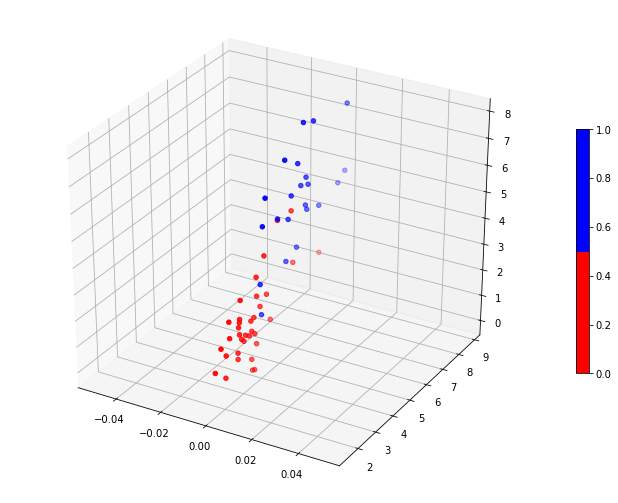

In [30]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','blue']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=20)
plt.savefig('StackAE_3d.png')
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.8596491228070176 and k :  [0 2 3 5]


In [32]:
y_pred=knn.predict(latent_vector)

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.17543859649122806
Mean Squared Error: 0.17543859649122806
Root Mean Squared Error: 0.4188539082916955
[[26  9]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84        35
           1       0.70      0.95      0.81        22

    accuracy                           0.82        57
   macro avg       0.83      0.85      0.82        57
weighted avg       0.86      0.82      0.83        57

